In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import random
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [3]:
data_set = '091907'

把科學記號改成十進位

In [73]:
# import pandas as pd
# import decimal
# 
# # 讀取CSV文件，確保資料的精度
# df = pd.read_csv('data/combined_dataset_all.csv', encoding='utf-8-sig', dtype=str)
# 
# # 將Chlorophyll欄位轉換為不使用科學記號的小數形式
# df['Chlorophyll'] = df['Chlorophyll'].apply(lambda x: format(decimal.Decimal(x), 'f'))
# 
# # 輸出篩選後的結果到原本的CSV文件
# df.to_csv('data/combined_dataset_all.csv', index=False, encoding='utf-8-sig')
# 

先取出1000000筆來train看看

In [33]:
import pandas as pd

# 讀取CSV文件
combined_df = pd.read_csv(f"data_all/combined_2023{data_set}1530_Himawari_202309190710.csv")

# 隨機選取10000筆資料
sampled_df = combined_df.sample(n=1000000, random_state=1)

# 保存為新的CSV文件
sampled_df.to_csv("data_all/train_temp/train_combined_dataset_all.csv", index=False)

print("已成功從 combined_dataset_all.csv 中選取 1000000 筆資料並保存到 data/train_combined_dataset_all.csv")


已成功從 combined_dataset_all.csv 中選取 1000000 筆資料並保存到 data/train_combined_dataset_all.csv


In [34]:
data = pd.read_csv("data_all/train_temp/train_combined_dataset_all.csv")

In [35]:
data.info()
data.describe()
data.shape
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   GOCI2_Latitude      1000000 non-null  float64
 1   GOCI2_Longitude     1000000 non-null  float64
 2   Himawari_Latitude   1000000 non-null  float64
 3   Himawari_Longitude  1000000 non-null  float64
 4   Chlorophyll         1000000 non-null  float64
 5   Albedo_01           1000000 non-null  float64
 6   Albedo_02           1000000 non-null  float64
 7   Albedo_03           1000000 non-null  float64
 8   Albedo_04           1000000 non-null  float64
dtypes: float64(9)
memory usage: 68.7 MB
Index(['GOCI2_Latitude', 'GOCI2_Longitude', 'Himawari_Latitude',
       'Himawari_Longitude', 'Chlorophyll', 'Albedo_01', 'Albedo_02',
       'Albedo_03', 'Albedo_04'],
      dtype='object')


### output filtered csv

In [36]:
# 選擇所需的列
selected_columns = ['Albedo_01', 'Albedo_02', 'Albedo_03', 'Albedo_04', 'Chlorophyll']

# 過濾數據
filtered_data = data[selected_columns]

## 重命名列，去掉 '2km_'
#filtered_data.columns = ['albedo_01', 'albedo_02', 'albedo_03', 'albedo_04', 'Chlorophyll']
#
# 將過濾後的數據寫入新的CSV文件
filtered_data.to_csv("data_all/train_temp/train_nn_filtered_data.csv", index=False)

print("新的 CSV 文件已成功輸出，文件名為 data_all/train_temp/train_nn_filtered_data.csv")

新的 CSV 文件已成功輸出，文件名為 data_all/train_temp/train_nn_filtered_data.csv


移除包含 '<' 符號的行(因非海保署資料，故已不再需要)

In [8]:
# import pandas as pd
# 
# # 讀取CSV文件，確保資料的精度
# df = pd.read_csv('data/train_nn_filtered_data.csv', encoding='utf-8-sig', dtype=str)
# 
# # 移除包含 '<' 符號的行
# filtered_df = df[~df.apply(lambda row: row.str.contains('<|,').any(), axis=1)]
# 
# # 輸出篩選後的結果到新的CSV文件
# filtered_df.to_csv('data/train_filtered_and_trimmed_data.csv', index=False, encoding='utf-8-sig')
# 

科學記號轉小數看看

In [37]:
import pandas as pd
import decimal

# 讀取CSV文件，確保資料的精度
df = pd.read_csv('data_all/train_temp/train_nn_filtered_data.csv', encoding='utf-8-sig', dtype=str)

# 將Chlorophyll欄位轉換為不使用科學記號的小數形式
df['Chlorophyll'] = df['Chlorophyll'].apply(lambda x: format(decimal.Decimal(x), 'f'))

# 輸出篩選後的結果到原本的CSV文件
df.to_csv('data_all/train_temp/train_nn_filtered_data.csv', index=False, encoding='utf-8-sig')

資料的描述以及葉綠素值的分布圖

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Albedo_01    1000000 non-null  float64
 1   Albedo_02    1000000 non-null  float64
 2   Albedo_03    1000000 non-null  float64
 3   Albedo_04    1000000 non-null  float64
 4   Chlorophyll  1000000 non-null  float64
dtypes: float64(5)
memory usage: 38.1 MB
           Albedo_01       Albedo_02       Albedo_03       Albedo_04  \
count  1000000.00000  1000000.000000  1000000.000000  1000000.000000   
mean         0.07019        0.050071        0.025224        0.016304   
std          0.02156        0.021078        0.021062        0.025825   
min          0.03920        0.023800        0.011600        0.000600   
25%          0.05940        0.039800        0.016600        0.007100   
50%          0.06650        0.045700        0.020600        0.010700   
75%          0.07420        0.053400

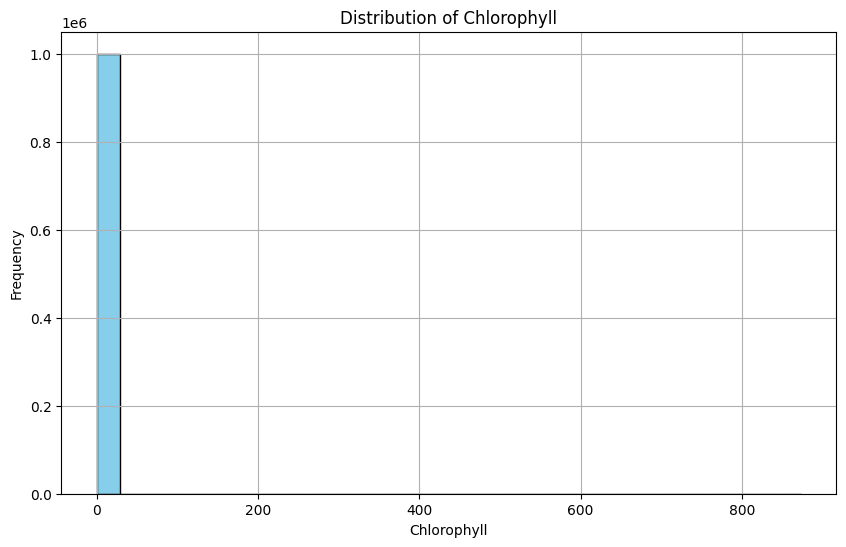

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV文件
data = pd.read_csv("data_all/train_temp/train_nn_filtered_data.csv")

# 確認數據的資訊
data.info()

# 顯示基本統計描述
print(data.describe())

# 顯示數據的形狀
print(data.shape)

# 顯示數據的欄位名稱
print(data.columns)

# 畫出Chlorophyll的分布圖
plt.figure(figsize=(10, 6))
plt.hist(data['Chlorophyll'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Chlorophyll')
plt.xlabel('Chlorophyll')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()







去除極端值

原始數據的描述性統計量:
count    1000000.000000
mean           0.412841
std            1.392567
min            0.000000
25%            0.131099
50%            0.213024
75%            0.327959
max          873.231570
Name: Chlorophyll, dtype: float64

過濾後數據的描述性統計量:
count    999940.000000
mean          0.408904
std           0.972772
min           0.000000
25%           0.131096
50%           0.213008
75%           0.327940
max          29.805084
Name: Chlorophyll, dtype: float64


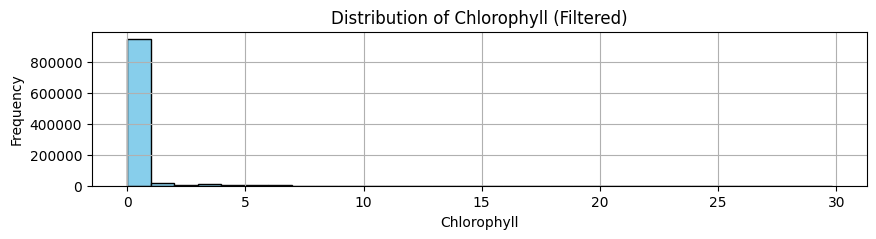

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV文件
data = pd.read_csv("data_all/train_temp/train_nn_filtered_data.csv")

# 顯示原始數據的描述性統計量
print("原始數據的描述性統計量:")
print(data['Chlorophyll'].describe())

# 去除Chlorophyll值大於10的極端值
data_filtered = data[data['Chlorophyll'] <= 30]

# 顯示過濾後數據的描述性統計量
print("\n過濾後數據的描述性統計量:")
print(data_filtered['Chlorophyll'].describe())

# 畫出過濾後Chlorophyll的分布圖
plt.figure(figsize=(10, 2))
plt.hist(data_filtered['Chlorophyll'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Chlorophyll (Filtered)')
plt.xlabel('Chlorophyll')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 將過濾後的數據保存到新的CSV文件中
data_filtered.to_csv("data_all/train_temp/train_nn_filtered_data_cleaned.csv", index=False)


count

In [40]:
print(data_filtered.Chlorophyll.count())
print(data_filtered.Albedo_01.count())
print(data_filtered.Albedo_02.count())
print(data_filtered.Albedo_03.count())
print(data_filtered.Albedo_04.count())

999940
999940
999940
999940
999940


In [42]:
train = data_filtered
train.info()
train.Chlorophyll.value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 999940 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Albedo_01    999940 non-null  float64
 1   Albedo_02    999940 non-null  float64
 2   Albedo_03    999940 non-null  float64
 3   Albedo_04    999940 non-null  float64
 4   Chlorophyll  999940 non-null  float64
dtypes: float64(5)
memory usage: 45.8 MB


Chlorophyll
0.000000    17
0.113012     6
0.112449     6
0.117527     5
0.123983     5
            ..
0.182699     1
0.557008     1
0.107658     1
0.134030     1
0.161908     1
Name: count, Length: 932360, dtype: int64

In [43]:
X = train.drop('Chlorophyll', axis=1)
y = train.Chlorophyll
y.value_counts()

Chlorophyll
0.000000    17
0.113012     6
0.112449     6
0.117527     5
0.123983     5
            ..
0.182699     1
0.557008     1
0.107658     1
0.134030     1
0.161908     1
Name: count, Length: 932360, dtype: int64

### Scalar

In [44]:
scaler = StandardScaler()
# scale the data to make it easier for the model to learn
X = scaler.fit_transform(X)

### Train

In [45]:
test_ratio = 0.2

random_seed = random.randint(1, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_ratio, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(100,)],
    'alpha': [0.0001, 0.001, 0.01, 0.05],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'activation': ['tanh', 'relu']
}



In [20]:
# # Create an MLPRegressor instance
# mlp = MLPRegressor(solver='sgd', max_iter=200,
#                    n_iter_no_change=10, tol=0.0001, verbose=1)
# 
# # Create a GridSearchCV instance
# grid_mlp = GridSearchCV(
#     mlp, param_grid, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, cv=5)
# 
# # Fit the grid search to the data
# grid_mlp.fit(X_train, y_train)
# 
# # Get the best estimator
# optimized_mlp = grid_mlp.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


Iteration 1, loss = 0.46905118
Iteration 1, loss = 0.49927776
Iteration 1, loss = 0.48763038
Iteration 2, loss = 0.42473478Iteration 1, loss = 0.44255522

Iteration 2, loss = 0.35729463
Iteration 2, loss = 0.45023922Iteration 3, loss = 0.42126552

Iteration 2, loss = 0.43622690
Iteration 3, loss = 0.34892633
Iteration 4, loss = 0.42056499Iteration 3, loss = 0.44634771

Iteration 3, loss = 0.43496130
Iteration 1, loss = 0.45516602
Iteration 4, loss = 0.34732871
Iteration 1, loss = 0.43357579
Iteration 4, loss = 0.44414171
Iteration 1, loss = 0.37526428Iteration 5, loss = 0.42002425

Iteration 4, loss = 0.43409508
Iteration 2, loss = 0.42897883
Iteration 1, loss = 0.47786991
Iteration 5, loss = 0.34621162
Iteration 6, loss = 0.41957973Iteration 2, loss = 0.42034328

Iteration 2, loss = 0.34112403
Iteration 5, loss = 0.43342286
Iteration 5, loss = 0.44238570
Iteration 3, loss = 0.42693596
Iteration 1, loss = 0.47313990
Iteration 2, loss = 0.44613447
Iteration 6, loss = 0.34535128
Iteratio

NN模型第二版

In [46]:
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (100, 100, 50)],
    'alpha': [0.0001, 0.001, 0.01, 0.05],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.05],
    'activation': ['tanh', 'relu']
}
mlp = MLPRegressor(solver='adam', max_iter=














, n_iter_no_change=20, tol=0.0001, verbose=1)
grid_mlp = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, cv=5)
grid_mlp.fit(X_train, y_train)
# Get the best estimator
optimized_mlp = grid_mlp.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Iteration 1, loss = 0.44904490
Iteration 1, loss = 0.45079688
Iteration 1, loss = 0.45391151
Iteration 1, loss = 0.43819560
Iteration 1, loss = 0.45300366
Iteration 1, loss = 0.44380013
Iteration 1, loss = 0.44721866
Iteration 1, loss = 0.45557289
Iteration 1, loss = 0.44732256
Iteration 1, loss = 0.44581849
Iteration 1, loss = 0.43776036
Iteration 1, loss = 0.44677643
Iteration 1, loss = 0.44239003
Iteration 1, loss = 0.44467266
Iteration 1, loss = 0.44374931
Iteration 1, loss = 0.44983175
Iteration 2, loss = 0.44423490
Iteration 2, loss = 0.43897588
Iteration 2, loss = 0.44555318
Iteration 2, loss = 0.44864880
Iteration 2, loss = 0.44013066
Iteration 2, loss = 0.43513336
Iteration 2, loss = 0.44167832
Iteration 2, loss = 0.44632016
Iteration 2, loss = 0.43366011
Iteration 2, loss = 0.44459495
Iteration 2, loss = 0.44013397Iteration 2, loss = 0.44177178

Iteration 2, loss = 0.44279417
Iteration 2, loss = 0.43923119
Iteratio

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 128, loss = 0.34726287
Iteration 135, loss = 0.38178348
Iteration 485, loss = 0.37651626
Iteration 464, loss = 0.37679936
Iteration 487, loss = 0.37236148
Iteration 148, loss = 0.37986972
Iteration 2, loss = 0.42788024
Iteration 161, loss = 0.37891605
Iteration 135, loss = 0.34474808
Iteration 145, loss = 0.37682865
Iteration 486, loss = 0.37664261
Iteration 127, loss = 0.34884049
Iteration 11, loss = 0.42324692
Iteration 465, loss = 0.37680250
Iteration 125, loss = 0.34263037
Iteration 96, loss = 0.35044829
Iteration 488, loss = 0.37228341
Iteration 146, loss = 0.38329629
Iteration 1, loss = 0.49591083
Iteration 129, loss = 0.34742040
Iteration 136, loss = 0.38164372
Iteration 487, loss = 0.37649153
Iteration 466, loss = 0.37674822
Iteration 489, loss = 0.37218751
Iteration 162, loss = 0.37877904
Iteration 149, loss = 0.37970847
Iteration 136, loss = 0.34461230
Iteration 3, loss = 0.42786199
Iteration 128, loss = 0.34854741
Iteration 488, loss = 0.37639090
Iteration 126, los

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 0.49466302
Iteration 152, loss = 0.38233901
Iteration 477, loss = 0.37640798
Iteration 168, loss = 0.37798439
Iteration 499, loss = 0.37619683
Iteration 142, loss = 0.38065480
Iteration 151, loss = 0.37591262
Iteration 17, loss = 0.42513866
Iteration 142, loss = 0.34374888
Iteration 132, loss = 0.34208443
Iteration 478, loss = 0.37644362
Iteration 134, loss = 0.34788817
Iteration 500, loss = 0.37616793


/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 103, loss = 0.34953087
Iteration 135, loss = 0.34639792
Iteration 155, loss = 0.37885491
Iteration 9, loss = 0.42981814
Iteration 8, loss = 0.49754623
Iteration 1, loss = 0.48175158
Iteration 153, loss = 0.38215710
Iteration 479, loss = 0.37628205
Iteration 169, loss = 0.37789199
Iteration 143, loss = 0.38048414
Iteration 152, loss = 0.37576177
Iteration 143, loss = 0.34342353
Iteration 18, loss = 0.42575862
Iteration 133, loss = 0.34201453
Iteration 135, loss = 0.34832895
Iteration 480, loss = 0.37629893
Iteration 1, loss = 0.48738408
Iteration 104, loss = 0.34921833
Iteration 156, loss = 0.37866195
Iteration 136, loss = 0.34607180
Iteration 10, loss = 0.43111594
Iteration 2, loss = 0.47350362
Iteration 9, loss = 0.49613547
Iteration 154, loss = 0.38208488
Iteration 170, loss = 0.37774003
Iteration 481, loss = 0.37647338
Iteration 144, loss = 0.38030176
Iteration 153, loss = 0.37568826
Iteration 144, loss = 0.34369834
Iteration 19, loss = 0.42594010
Iteration 134, loss = 0.3

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 145, loss = 0.34534726
Iteration 163, loss = 0.38076627
Iteration 114, loss = 0.34783433
Iteration 180, loss = 0.37646861
Iteration 162, loss = 0.37432896
Iteration 166, loss = 0.37733075
Iteration 154, loss = 0.37869841
Iteration 12, loss = 0.50421509
Iteration 154, loss = 0.34257336
Iteration 2, loss = 0.45880843
Iteration 20, loss = 0.43327631
Iteration 144, loss = 0.34097857
Iteration 19, loss = 0.49584020
Iteration 146, loss = 0.34621000
Iteration 12, loss = 0.49992524
Iteration 1, loss = 0.49168471
Iteration 164, loss = 0.38058786
Iteration 146, loss = 0.34497803
Iteration 181, loss = 0.37633563
Iteration 115, loss = 0.34747613
Iteration 167, loss = 0.37713102
Iteration 163, loss = 0.37418038
Iteration 155, loss = 0.37853227
Iteration 3, loss = 0.47474259
Iteration 13, loss = 0.50293908
Iteration 155, loss = 0.34253025
Iteration 21, loss = 0.43364187
Iteration 145, loss = 0.34062883
Iteration 20, loss = 0.49351943
Iteration 147, loss = 0.34649805
Iteration 13, loss = 0.

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 63, loss = 0.39978329
Iteration 350, loss = 0.39149396
Iteration 480, loss = 0.35179308
Iteration 71, loss = 0.39806954
Iteration 485, loss = 0.35111025
Iteration 12, loss = 0.39865678
Iteration 482, loss = 0.35044955
Iteration 351, loss = 0.39165540
Iteration 66, loss = 0.40344260
Iteration 64, loss = 0.39359407
Iteration 57, loss = 0.40147881
Iteration 481, loss = 0.35544136
Iteration 45, loss = 0.37725407
Iteration 48, loss = 0.37856944
Iteration 352, loss = 0.39144448
Iteration 39, loss = 0.37506257
Iteration 1, loss = 0.43755453
Iteration 43, loss = 0.37792605
Iteration 64, loss = 0.39956393
Iteration 481, loss = 0.35174204
Iteration 486, loss = 0.35120142
Iteration 72, loss = 0.39782132
Iteration 13, loss = 0.39777148
Iteration 353, loss = 0.39152777
Iteration 483, loss = 0.35041950
Iteration 65, loss = 0.39339695
Iteration 67, loss = 0.40325001
Iteration 58, loss = 0.40131135
Iteration 482, loss = 0.35526920
Iteration 49, loss = 0.37838445
Iteration 354, loss = 0.39159

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 383, loss = 0.39126185
Iteration 59, loss = 0.37306438
Iteration 497, loss = 0.34985749
Training loss did not improve more than tol=0.000100 for 20 consecutive epochs. Stopping.
Iteration 79, loss = 0.39083688
Iteration 495, loss = 0.35471815
Iteration 81, loss = 0.40034834
Iteration 495, loss = 0.35117984
Iteration 384, loss = 0.39120060
Training loss did not improve more than tol=0.000100 for 20 consecutive epochs. Stopping.
Iteration 57, loss = 0.37297042
Iteration 27, loss = 0.38528813
Iteration 54, loss = 0.36980989
Iteration 63, loss = 0.37416479
Iteration 86, loss = 0.39508780
Iteration 17, loss = 0.43188534
Iteration 79, loss = 0.39655673
Iteration 72, loss = 0.39842158
Iteration 1, loss = 0.43942213
Iteration 60, loss = 0.37278226
Iteration 80, loss = 0.39070679
Iteration 1, loss = 0.44087863
Iteration 496, loss = 0.35107804
Iteration 82, loss = 0.40010788
Iteration 496, loss = 0.35478880
Iteration 1, loss = 0.43219680
Iteration 28, loss = 0.38435975
Iteration 58, lo

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.42947270
Iteration 5, loss = 0.43749784
Iteration 500, loss = 0.35099153


/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 84, loss = 0.39003556
Iteration 22, loss = 0.42990493
Iteration 32, loss = 0.38186665
Iteration 59, loss = 0.36821321
Iteration 68, loss = 0.37313601
Iteration 62, loss = 0.37155974
Iteration 91, loss = 0.39420133
Iteration 6, loss = 0.43494599
Iteration 84, loss = 0.39557175
Iteration 77, loss = 0.39732455
Iteration 6, loss = 0.42824337
Iteration 65, loss = 0.37176545
Iteration 87, loss = 0.39905217
Iteration 6, loss = 0.43836560
Iteration 1, loss = 0.43767256
Iteration 23, loss = 0.42980157
Iteration 85, loss = 0.38984830
Iteration 1, loss = 0.49133481
Iteration 33, loss = 0.38122486
Iteration 60, loss = 0.36814635
Iteration 69, loss = 0.37281327
Iteration 63, loss = 0.37162900
Iteration 92, loss = 0.39399907
Iteration 7, loss = 0.43568073
Iteration 78, loss = 0.39707755
Iteration 85, loss = 0.39543373
Iteration 7, loss = 0.42849260
Iteration 7, loss = 0.43712333
Iteration 88, loss = 0.39892261
Iteration 2, loss = 0.43433247
Iteration 66, loss = 0.37111389
Iteration 24, los

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 187, loss = 0.39680334
Iteration 190, loss = 0.40059822
Iteration 171, loss = 0.39994490
Iteration 30, loss = 0.42980594
Iteration 204, loss = 0.39945950
Iteration 17, loss = 0.41727995
Iteration 138, loss = 0.39381271
Iteration 499, loss = 0.36256352
Iteration 486, loss = 0.36003569
Iteration 190, loss = 0.39465697
Iteration 195, loss = 0.39807053
Iteration 146, loss = 0.39786618
Iteration 195, loss = 0.40118520
Iteration 195, loss = 0.39898266
Iteration 191, loss = 0.40058169
Iteration 188, loss = 0.39673001
Iteration 69, loss = 0.42195658
Iteration 1, loss = 0.44224112
Iteration 31, loss = 0.42499614
Iteration 172, loss = 0.39990638
Iteration 500, loss = 0.36255750


/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 205, loss = 0.39933114
Iteration 18, loss = 0.41774215
Iteration 196, loss = 0.39787945
Iteration 191, loss = 0.39460356
Iteration 147, loss = 0.39747852
Iteration 139, loss = 0.39359936
Iteration 487, loss = 0.35997273
Iteration 196, loss = 0.40106218
Iteration 192, loss = 0.40047730
Iteration 189, loss = 0.39685817
Iteration 196, loss = 0.39883352
Iteration 32, loss = 0.42484124
Iteration 70, loss = 0.42170638
Iteration 2, loss = 0.43329730
Iteration 173, loss = 0.39983740
Iteration 206, loss = 0.39923977
Iteration 1, loss = 0.49281258
Iteration 197, loss = 0.39774804
Iteration 19, loss = 0.41797947
Iteration 148, loss = 0.39761063
Iteration 192, loss = 0.39452480
Iteration 488, loss = 0.35999722
Iteration 140, loss = 0.39332838
Iteration 193, loss = 0.40045496
Iteration 197, loss = 0.40105490
Iteration 190, loss = 0.39663470
Iteration 33, loss = 0.42587166
Iteration 3, loss = 0.43210613
Iteration 197, loss = 0.39888416
Iteration 71, loss = 0.42306240
Training loss did not 

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.49427764
Iteration 209, loss = 0.39827642
Iteration 203, loss = 0.39665246
Iteration 219, loss = 0.39868309
Iteration 209, loss = 0.40045994
Iteration 207, loss = 0.39973527
Iteration 12, loss = 0.49737351
Iteration 162, loss = 0.39754139
Iteration 32, loss = 0.41819086
Iteration 186, loss = 0.39932966
Iteration 46, loss = 0.42513790
Iteration 212, loss = 0.39767105
Iteration 152, loss = 0.39327798
Iteration 16, loss = 0.42440783
Iteration 206, loss = 0.39395445
Iteration 16, loss = 0.49794714
Iteration 1, loss = 0.49520872
Iteration 210, loss = 0.39814721
Iteration 204, loss = 0.39664601
Iteration 220, loss = 0.39867425
Iteration 208, loss = 0.39960164
Iteration 210, loss = 0.40028389
Iteration 163, loss = 0.39765996
Iteration 13, loss = 0.49676011
Iteration 33, loss = 0.41878900
Iteration 47, loss = 0.42527994
Iteration 187, loss = 0.39941863
Iteration 213, loss = 0.39744561
Iteration 153, loss = 0.39340873
Iteration 17, loss = 0.42393823
Iteration 207, loss = 

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 414, loss = 0.36276569
Iteration 331, loss = 0.33689018
Iteration 291, loss = 0.39297459
Iteration 485, loss = 0.35660443
Iteration 174, loss = 0.37814271
Iteration 239, loss = 0.39328553
Iteration 1, loss = 0.42311168
Iteration 251, loss = 0.34009531
Iteration 249, loss = 0.34312550
Iteration 59, loss = 0.38281343
Iteration 2, loss = 0.41331635
Iteration 73, loss = 0.38744826
Iteration 351, loss = 0.36520474
Iteration 3, loss = 0.41098045
Iteration 291, loss = 0.34387260
Iteration 147, loss = 0.38282435
Iteration 4, loss = 0.40916519
Iteration 32, loss = 0.39216913
Iteration 292, loss = 0.39308913
Iteration 240, loss = 0.39334585
Iteration 175, loss = 0.37766967
Iteration 5, loss = 0.40861601
Iteration 418, loss = 0.36318764
Iteration 60, loss = 0.38263557
Iteration 74, loss = 0.38757918
Iteration 6, loss = 0.40773639
Iteration 293, loss = 0.39299334
Iteration 486, loss = 0.35619674
Iteration 148, loss = 0.38293779
Iteration 241, loss = 0.39327009
Training loss did not impro

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 321, loss = 0.39234930
Iteration 430, loss = 0.36281225
Iteration 52, loss = 0.38834380
Iteration 1, loss = 0.43041060
Iteration 96, loss = 0.38546564
Iteration 38, loss = 0.40419354
Iteration 36, loss = 0.40601510
Iteration 2, loss = 0.41791681
Iteration 342, loss = 0.33696344
Iteration 260, loss = 0.33999777
Iteration 3, loss = 0.41521127
Iteration 81, loss = 0.38036786
Iteration 169, loss = 0.38211732
Iteration 4, loss = 0.41391365
Iteration 322, loss = 0.39242633
Iteration 199, loss = 0.37717190
Iteration 39, loss = 0.40437994
Iteration 37, loss = 0.40621208
Iteration 5, loss = 0.41352391
Iteration 97, loss = 0.38539932
Iteration 53, loss = 0.38848084
Iteration 427, loss = 0.36222660
Iteration 6, loss = 0.41270534
Iteration 323, loss = 0.39237041
Iteration 362, loss = 0.36460329
Iteration 40, loss = 0.40461606
Iteration 38, loss = 0.40631159
Iteration 82, loss = 0.38015207
Iteration 170, loss = 0.38211827
Iteration 200, loss = 0.37745160
Iteration 259, loss = 0.34328505
I

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, loss = 0.39931126
Iteration 26, loss = 0.40505504
Iteration 224, loss = 0.37900223
Iteration 1, loss = 0.42449610
Iteration 203, loss = 0.37417276
Iteration 328, loss = 0.37390748
Iteration 495, loss = 0.35973206
Iteration 2, loss = 0.41003069
Iteration 168, loss = 0.37928739
Iteration 402, loss = 0.33508809
Iteration 3, loss = 0.40608484
Iteration 225, loss = 0.37917962
Iteration 4, loss = 0.40370261
Iteration 204, loss = 0.37388727
Iteration 329, loss = 0.37415465
Iteration 26, loss = 0.39428139
Iteration 23, loss = 0.38389269
Iteration 312, loss = 0.34156704
Iteration 30, loss = 0.39683736
Iteration 169, loss = 0.37951083
Iteration 421, loss = 0.36188133
Iteration 310, loss = 0.33834220
Iteration 33, loss = 0.39793010
Iteration 226, loss = 0.37901746
Iteration 27, loss = 0.39891709
Iteration 496, loss = 0.35965086
Iteration 330, loss = 0.37406597
Training loss did not improve more than tol=0.000100 for 20 consecutive epochs. Stopping.
Iteration 205, loss = 0.37389503
I

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 212, loss = 0.37362612
Iteration 234, loss = 0.37845894
Iteration 1, loss = 0.41704747
Iteration 177, loss = 0.37906642
Iteration 425, loss = 0.36158637
Iteration 30, loss = 0.40367278
Iteration 2, loss = 0.40330755
Iteration 9, loss = 0.39502667
Iteration 3, loss = 0.39996513
Iteration 213, loss = 0.37403812
Iteration 34, loss = 0.39565358
Iteration 316, loss = 0.34117403
Iteration 235, loss = 0.37861129
Iteration 4, loss = 0.39690537
Iteration 27, loss = 0.38168512
Iteration 407, loss = 0.33542267
Iteration 178, loss = 0.37922909
Iteration 31, loss = 0.39760761
Iteration 37, loss = 0.39675525
Iteration 9, loss = 0.39737366
Iteration 30, loss = 0.39301681
Iteration 214, loss = 0.37359391
Iteration 236, loss = 0.37855668
Iteration 314, loss = 0.33796452
Iteration 5, loss = 0.39511984
Iteration 179, loss = 0.37899182
Iteration 426, loss = 0.36148067
Iteration 10, loss = 0.39347253
Iteration 237, loss = 0.37869712
Iteration 215, loss = 0.37391905
Iteration 31, loss = 0.40352636

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 46, loss = 0.40505874
Iteration 43, loss = 0.40793977
Iteration 106, loss = 0.38259133
Iteration 11, loss = 0.40585990
Iteration 92, loss = 0.39149193
Iteration 37, loss = 0.39817747
Iteration 1, loss = 0.45392726
Iteration 91, loss = 0.38218047
Iteration 77, loss = 0.36735684
Iteration 80, loss = 0.36221071
Iteration 2, loss = 0.43305289
Iteration 101, loss = 0.38408333
Iteration 105, loss = 0.38599581
Iteration 3, loss = 0.42784276
Iteration 45, loss = 0.40197118
Iteration 47, loss = 0.40519687
Iteration 43, loss = 0.37250985
Iteration 44, loss = 0.40819081
Iteration 78, loss = 0.36683976
Iteration 4, loss = 0.42766033
Iteration 12, loss = 0.40628908
Iteration 38, loss = 0.39849182
Iteration 5, loss = 0.42717268
Iteration 96, loss = 0.36449205
Iteration 107, loss = 0.38276600
Iteration 46, loss = 0.40269780
Iteration 48, loss = 0.40500035
Iteration 45, loss = 0.40812693
Iteration 81, loss = 0.36245881
Iteration 6, loss = 0.42523660
Iteration 93, loss = 0.39138266
Iteration 

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 147, loss = 0.39298466
Iteration 154, loss = 0.39072745
Iteration 1, loss = 0.42744317
Iteration 418, loss = 0.36070700
Iteration 224, loss = 0.38113238
Iteration 2, loss = 0.41895300
Iteration 166, loss = 0.38515217
Iteration 1, loss = 0.42849781
Iteration 159, loss = 0.38661742
Iteration 3, loss = 0.41656602
Iteration 2, loss = 0.41957957
Iteration 4, loss = 0.41550437
Iteration 202, loss = 0.38919687
Iteration 170, loss = 0.38389767
Iteration 3, loss = 0.41805661
Iteration 430, loss = 0.37212760
Iteration 4, loss = 0.41733085
Iteration 5, loss = 0.41563401
Iteration 496, loss = 0.36138858
Iteration 470, loss = 0.36457039
Iteration 222, loss = 0.38334945
Iteration 139, loss = 0.37994079
Iteration 5, loss = 0.41642745
Iteration 225, loss = 0.38103109
Iteration 6, loss = 0.41490641
Iteration 51, loss = 0.39057511
Iteration 419, loss = 0.36049305
Iteration 167, loss = 0.38469869
Iteration 160, loss = 0.38708692
Iteration 155, loss = 0.39052223
Iteration 6, loss = 0.41558008
It

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 54, loss = 0.39055808
Iteration 170, loss = 0.38510315
Iteration 18, loss = 0.41454072
Iteration 206, loss = 0.38908357
Iteration 226, loss = 0.38327517
Iteration 17, loss = 0.41476251
Iteration 229, loss = 0.38099214
Iteration 1, loss = 0.43182599
Iteration 422, loss = 0.36042264
Iteration 19, loss = 0.41479293
Iteration 174, loss = 0.38348794
Iteration 2, loss = 0.42286899
Iteration 18, loss = 0.41451567
Iteration 143, loss = 0.37926409
Iteration 434, loss = 0.37213269
Iteration 20, loss = 0.41475322
Iteration 3, loss = 0.42177649
Iteration 474, loss = 0.36464347
Iteration 4, loss = 0.42066280
Iteration 19, loss = 0.41461884
Iteration 158, loss = 0.39031225
Iteration 21, loss = 0.41465661
Iteration 20, loss = 0.41431837
Iteration 164, loss = 0.38684699
Iteration 5, loss = 0.42001249
Iteration 22, loss = 0.41427388
Iteration 151, loss = 0.39257399
Iteration 171, loss = 0.38503390
Iteration 227, loss = 0.38331890
Iteration 207, loss = 0.38914637
Iteration 21, loss = 0.4145798

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, loss = 0.44092670
Iteration 201, loss = 0.38342814
Iteration 46, loss = 0.43406684
Iteration 13, loss = 0.43208632
Iteration 80, loss = 0.38855148
Iteration 14, loss = 0.43196122
Iteration 23, loss = 0.43648729
Iteration 20, loss = 0.44075913
Iteration 47, loss = 0.43402151
Iteration 15, loss = 0.43181270
Iteration 24, loss = 0.43628438
Iteration 21, loss = 0.44064356
Iteration 48, loss = 0.43394645
Iteration 1, loss = 0.45358770
Iteration 16, loss = 0.43165579
Iteration 2, loss = 0.44356818
Iteration 197, loss = 0.38372014
Iteration 25, loss = 0.43614116
Iteration 22, loss = 0.44049103
Iteration 17, loss = 0.43152459
Iteration 49, loss = 0.43388668
Iteration 3, loss = 0.44200407
Iteration 26, loss = 0.43599698
Iteration 4, loss = 0.44121247
Iteration 18, loss = 0.43141888
Iteration 23, loss = 0.44036173
Iteration 50, loss = 0.43377760
Iteration 5, loss = 0.44070470
Iteration 19, loss = 0.43131094
Iteration 180, loss = 0.38860982
Iteration 27, loss = 0.43585382
Iteration 

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.42017818
Iteration 240, loss = 0.38337407
Iteration 65, loss = 0.41878910
Iteration 68, loss = 0.42269540
Iteration 1, loss = 0.44412367
Iteration 52, loss = 0.41548268
Iteration 14, loss = 0.41150027
Iteration 70, loss = 0.41478678
Iteration 307, loss = 0.38007191
Iteration 2, loss = 0.43167487
Iteration 77, loss = 0.41731514
Iteration 3, loss = 0.42464755
Iteration 4, loss = 0.42174529
Iteration 19, loss = 0.42005949
Iteration 53, loss = 0.41543892
Iteration 69, loss = 0.42275429
Iteration 66, loss = 0.41876358
Iteration 5, loss = 0.42035200
Iteration 15, loss = 0.41145106
Iteration 78, loss = 0.41729922
Iteration 71, loss = 0.41477679
Iteration 310, loss = 0.37789778
Iteration 278, loss = 0.38608123
Iteration 20, loss = 0.41995152
Iteration 204, loss = 0.38934427
Iteration 54, loss = 0.41538717
Iteration 486, loss = 0.35804392
Iteration 123, loss = 0.38557631
Iteration 216, loss = 0.38649509
Iteration 70, loss = 0.42263057
Iteration 6, loss = 0.41943505
Iterat

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 23, loss = 0.45047025
Training loss did not improve more than tol=0.000100 for 20 consecutive epochs. Stopping.
Iteration 5, loss = 0.44126797
Iteration 4, loss = 0.44727881
Iteration 216, loss = 0.38857936
Iteration 1, loss = 0.46042857
Iteration 5, loss = 0.44738671
Iteration 6, loss = 0.44079628
Iteration 101, loss = 0.41312647
Iteration 51, loss = 0.41030117
Iteration 229, loss = 0.38565152
Iteration 42, loss = 0.41579900
Iteration 1, loss = 0.45798028
Iteration 7, loss = 0.44118904
Iteration 2, loss = 0.44597362
Iteration 326, loss = 0.37926574
Iteration 103, loss = 0.42126493
Iteration 6, loss = 0.44722029
Iteration 95, loss = 0.41724050
Iteration 8, loss = 0.44095554
Iteration 2, loss = 0.44743853
Iteration 3, loss = 0.44165391
Iteration 7, loss = 0.44767072
Iteration 9, loss = 0.44025573
Iteration 8, loss = 0.44730118
Iteration 3, loss = 0.44343334
Iteration 10, loss = 0.44081541
Iteration 4, loss = 0.43749548
Iteration 9, loss = 0.44646080
Iteration 52, loss = 0.4104

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 450, loss = 0.38125717
Iteration 330, loss = 0.38408540
Iteration 123, loss = 0.40731040
Iteration 355, loss = 0.37991255
Iteration 122, loss = 0.40630073
Iteration 451, loss = 0.38123424
Iteration 121, loss = 0.40175054
Iteration 114, loss = 0.40872050
Iteration 115, loss = 0.40997007
Iteration 331, loss = 0.38399821
Iteration 452, loss = 0.38122735
Iteration 356, loss = 0.37979559
Iteration 124, loss = 0.40729961
Iteration 123, loss = 0.40611276
Iteration 122, loss = 0.40169292
Iteration 116, loss = 0.41003259
Iteration 115, loss = 0.40879029
Iteration 453, loss = 0.38084761
Iteration 332, loss = 0.38389001
Iteration 357, loss = 0.37995310
Iteration 125, loss = 0.40742855
Iteration 124, loss = 0.40597211
Iteration 454, loss = 0.38101579
Iteration 123, loss = 0.40162856
Iteration 117, loss = 0.40989438
Iteration 333, loss = 0.38374824
Iteration 116, loss = 0.40860167
Iteration 358, loss = 0.37983269
Iteration 126, loss = 0.40719653
Iteration 455, loss = 0.38106888
Iteration 

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 146, loss = 0.40842098
Iteration 395, loss = 0.37855338
Iteration 366, loss = 0.38250866
Iteration 154, loss = 0.40480431
Iteration 143, loss = 0.40773727
Iteration 158, loss = 0.40625261
Iteration 152, loss = 0.40083081
Iteration 396, loss = 0.37868528
Iteration 147, loss = 0.40843696
Iteration 367, loss = 0.38281940
Iteration 155, loss = 0.40501935
Iteration 159, loss = 0.40612498
Iteration 144, loss = 0.40749748
Iteration 397, loss = 0.37843424
Iteration 153, loss = 0.40065899
Iteration 148, loss = 0.40844356
Iteration 368, loss = 0.38243073
Iteration 156, loss = 0.40476238
Iteration 398, loss = 0.37858941
Iteration 160, loss = 0.40615016
Iteration 145, loss = 0.40752694
Iteration 154, loss = 0.40069841
Iteration 369, loss = 0.38267527
Iteration 149, loss = 0.40846625
Iteration 399, loss = 0.37838837
Iteration 157, loss = 0.40475609
Iteration 161, loss = 0.40603207
Iteration 370, loss = 0.38228035
Iteration 146, loss = 0.40761122
Iteration 155, loss = 0.40062370
Iteration 

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 241, loss = 0.40214246
Iteration 461, loss = 0.37946478
Iteration 222, loss = 0.40564107
Iteration 230, loss = 0.39833075
Iteration 462, loss = 0.37948464
Iteration 242, loss = 0.40209249
Iteration 223, loss = 0.40557069
Iteration 231, loss = 0.39833116
Iteration 463, loss = 0.37949735
Iteration 243, loss = 0.40225830
Iteration 232, loss = 0.39836692
Iteration 224, loss = 0.40574843
Iteration 464, loss = 0.37940665
Iteration 244, loss = 0.40195283
Iteration 465, loss = 0.37959655
Iteration 233, loss = 0.39829052
Iteration 225, loss = 0.40564380
Iteration 245, loss = 0.40227860
Iteration 466, loss = 0.37956913
Iteration 234, loss = 0.39827245
Iteration 226, loss = 0.40543635
Iteration 246, loss = 0.40209825
Iteration 467, loss = 0.37930589
Iteration 247, loss = 0.40198234
Iteration 235, loss = 0.39832232
Iteration 227, loss = 0.40549637
Iteration 468, loss = 0.37952901
Iteration 248, loss = 0.40192135
Iteration 236, loss = 0.39822586
Iteration 228, loss = 0.40558720
Iteration 

/home/louis/anaconda3/envs/ocean/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 254, loss = 0.40506701
Iteration 278, loss = 0.40146270
Iteration 255, loss = 0.40500485
Iteration 279, loss = 0.40137781
Iteration 256, loss = 0.40487289
Iteration 280, loss = 0.40153190
Iteration 281, loss = 0.40144124
Iteration 257, loss = 0.40489274
Iteration 282, loss = 0.40148103
Iteration 258, loss = 0.40479262
Iteration 283, loss = 0.40150766
Iteration 259, loss = 0.40477442
Iteration 284, loss = 0.40115466
Iteration 260, loss = 0.40488837
Iteration 285, loss = 0.40131218
Iteration 261, loss = 0.40486393
Iteration 286, loss = 0.40129554
Iteration 262, loss = 0.40474347
Iteration 287, loss = 0.40152462
Iteration 263, loss = 0.40471548
Iteration 288, loss = 0.40134810
Iteration 264, loss = 0.40471471
Iteration 289, loss = 0.40137348
Iteration 290, loss = 0.40148812
Iteration 265, loss = 0.40478093
Iteration 291, loss = 0.40130925
Iteration 266, loss = 0.40464290
Iteration 292, loss = 0.40119271
Iteration 267, loss = 0.40455968
Iteration 293, loss = 0.40143498
Iteration 

In [50]:
# Print the best parameters found by the grid search
print("MLP best parameters:", grid_mlp.best_params_)

# Make predictions
MLP_train_pred = optimized_mlp.predict(X_train)
MLP_test_pred = optimized_mlp.predict(X_test)


# 將預測結果限制在0到30之間
MLP_train_pred = np.clip(MLP_train_pred, 0, 30)
MLP_test_pred = np.clip(MLP_test_pred, 0, 30)

# Calculate the desired metrics
train_mae = mean_absolute_error(y_train, MLP_train_pred)
test_mae = mean_absolute_error(y_test, MLP_test_pred)
train_rmse = sqrt(mean_squared_error(y_train, MLP_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, MLP_test_pred))
train_r2 = r2_score(y_train, MLP_train_pred)
test_r2 = r2_score(y_test, MLP_test_pred)

# Print the calculated metrics
print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")

MLP best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 50), 'learning_rate_init': 0.001}
Train MAE: 0.2737878475561592
Test MAE: 0.2769263027337785
Train RMSE: 0.8057076890941917
Test RMSE: 0.8112973592191516
Train R2: 0.31650326285795394
Test R2: 0.2940209937243975


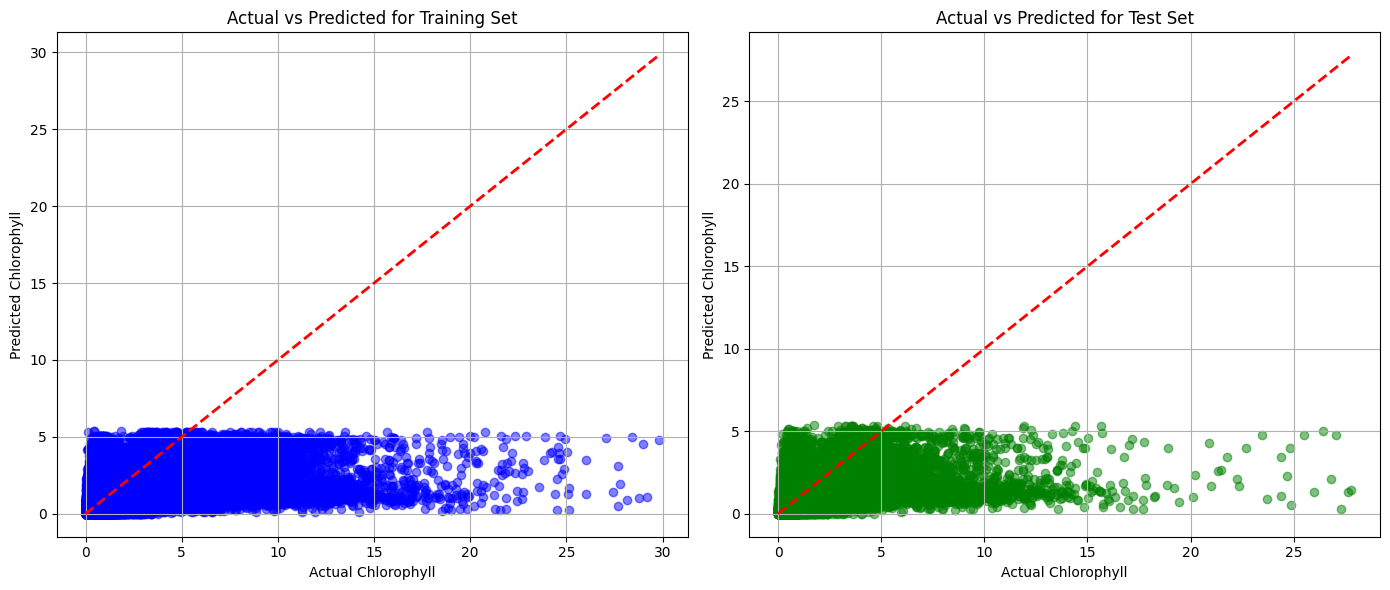

In [51]:
import matplotlib.pyplot as plt

# Assuming you have already run the previous code and have MLP_train_pred and MLP_test_pred ready

# Combine actual and predicted values for train and test sets
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': MLP_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': MLP_test_pred})

# Plot actual vs predicted for the training set
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(train_results['Actual'], train_results['Predicted'], alpha=0.5, color='blue')
plt.plot([train_results['Actual'].min(), train_results['Actual'].max()], 
         [train_results['Actual'].min(), train_results['Actual'].max()], 'r--', lw=2)
plt.title('Actual vs Predicted for Training Set')
plt.xlabel('Actual Chlorophyll')
plt.ylabel('Predicted Chlorophyll')
plt.grid(True)

# Plot actual vs predicted for the test set
plt.subplot(1, 2, 2)
plt.scatter(test_results['Actual'], test_results['Predicted'], alpha=0.5, color='green')
plt.plot([test_results['Actual'].min(), test_results['Actual'].max()], 
         [test_results['Actual'].min(), test_results['Actual'].max()], 'r--', lw=2)
plt.title('Actual vs Predicted for Test Set')
plt.xlabel('Actual Chlorophyll')
plt.ylabel('Predicted Chlorophyll')
plt.grid(True)

plt.tight_layout()
plt.show()


輸出不同解析度的圖

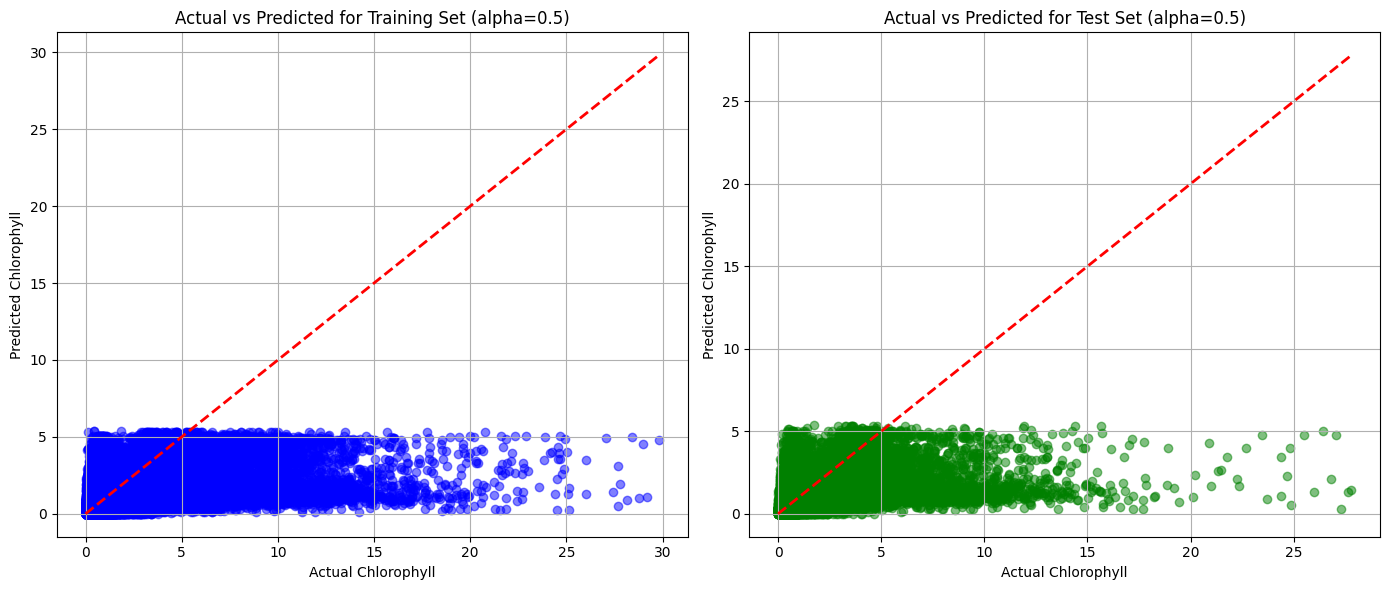

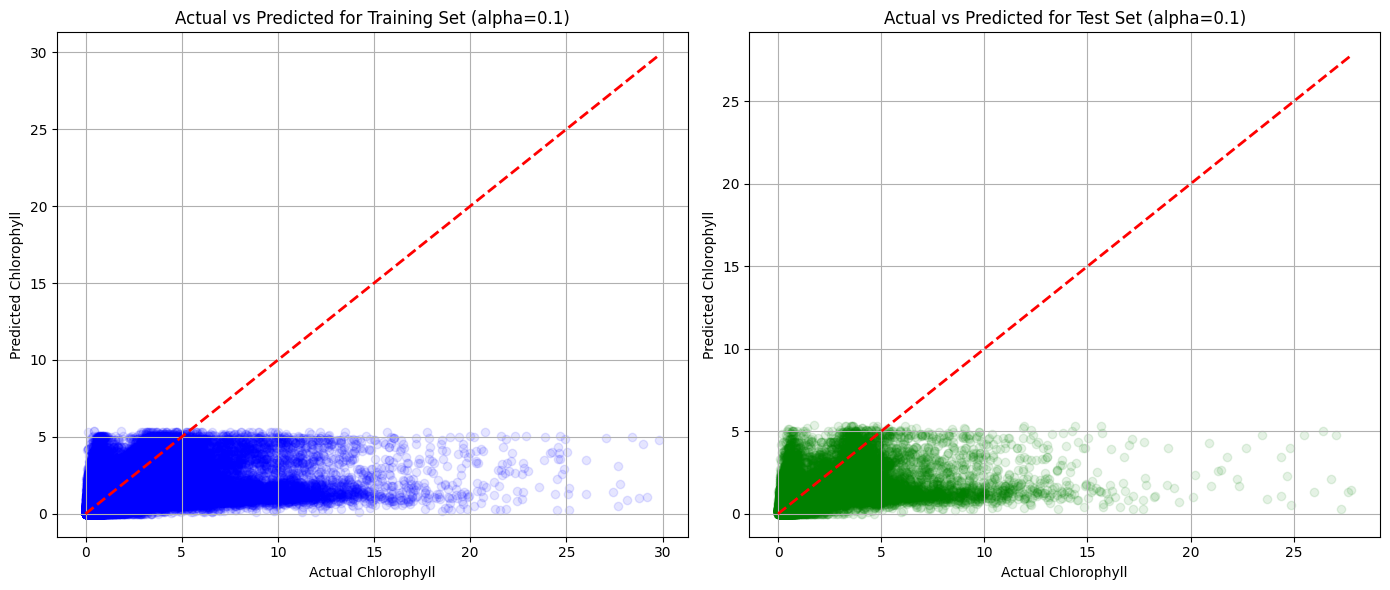

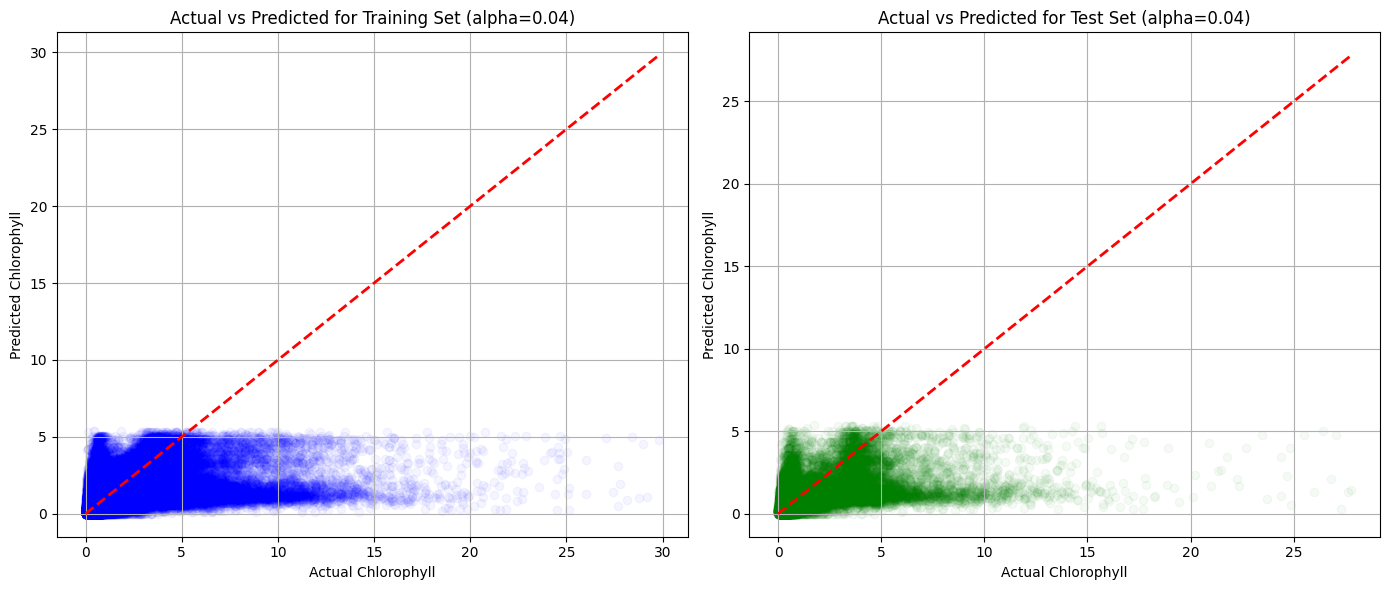

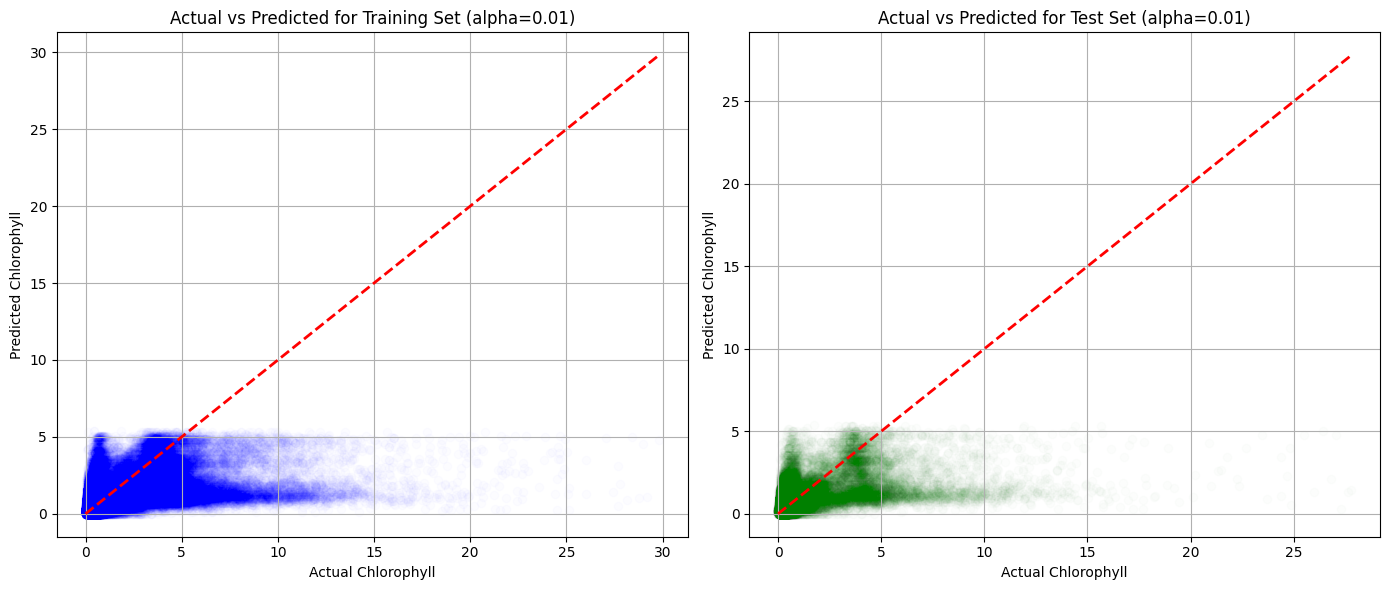

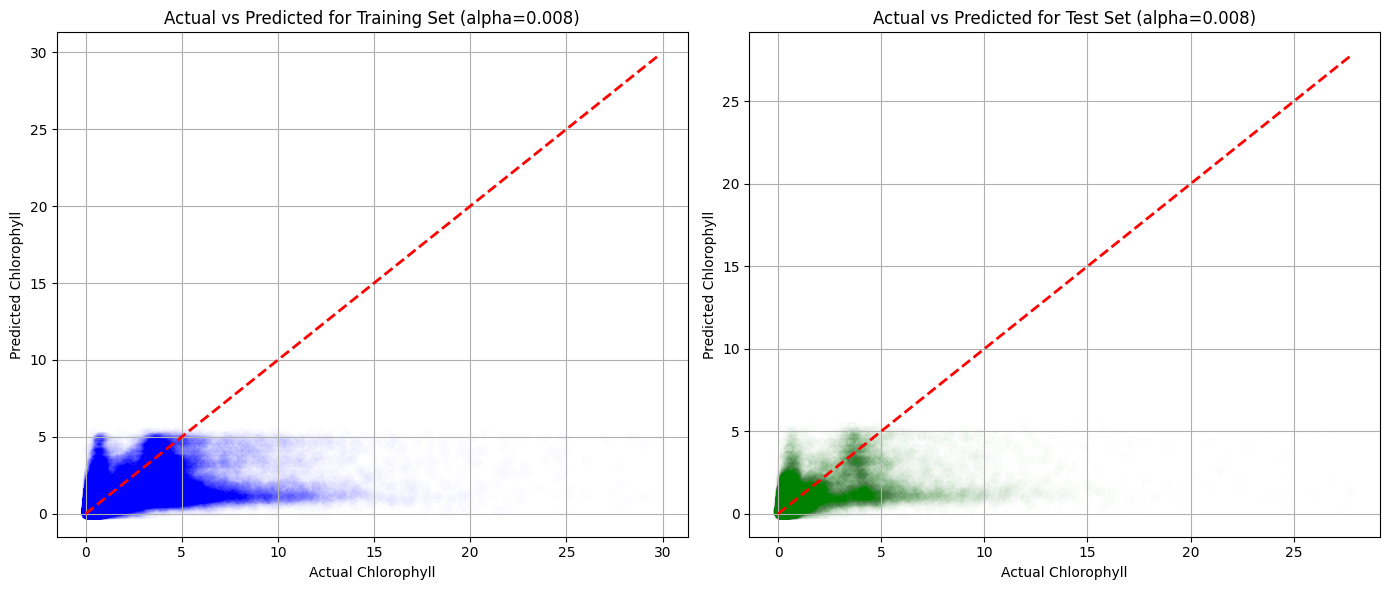

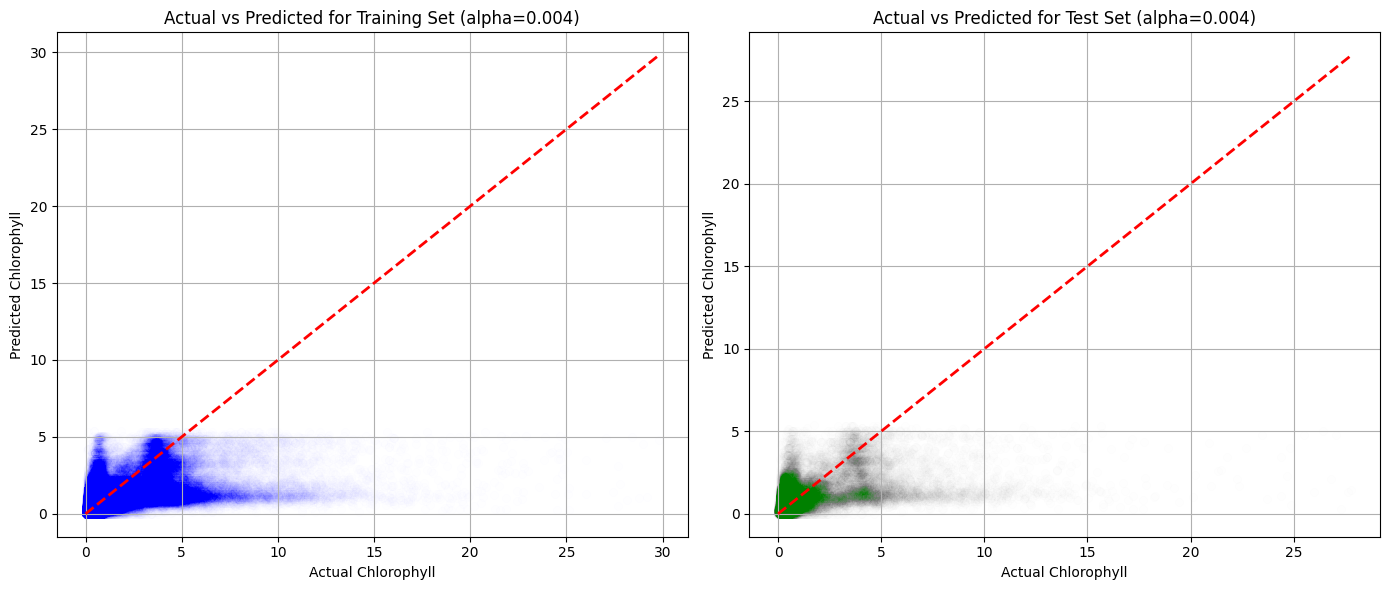

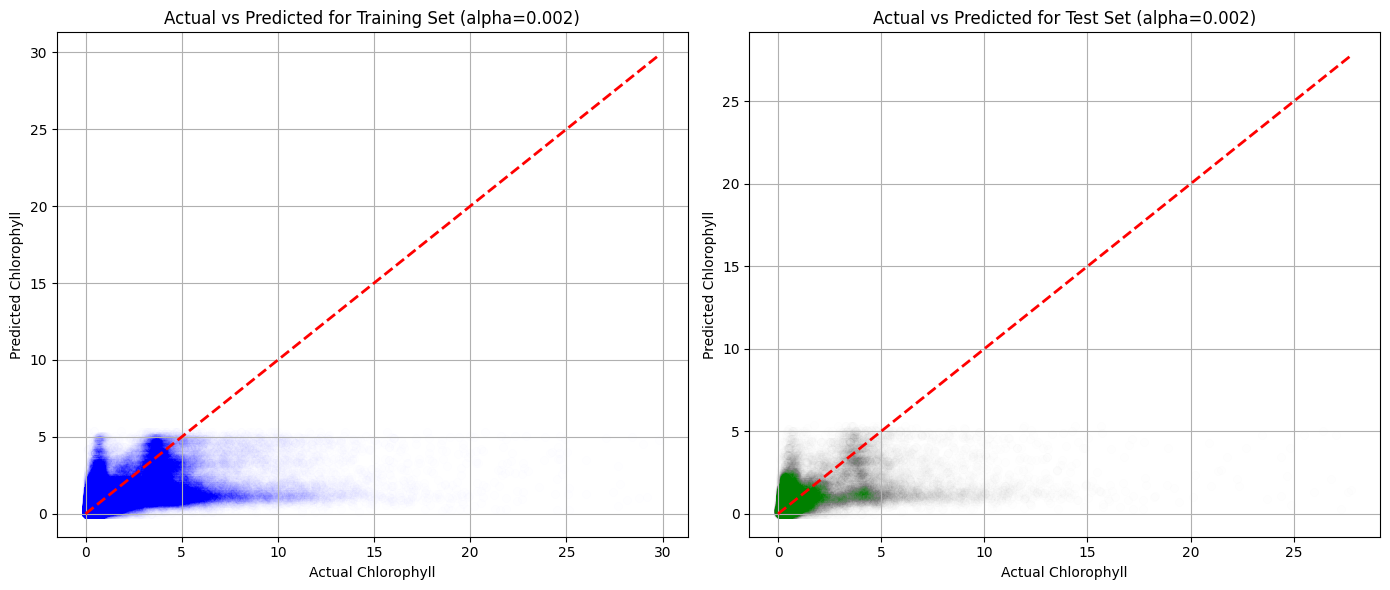

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# 假設你已經有 y_train, y_test, MLP_train_pred 和 MLP_test_pred 的數據

# Combine actual and predicted values for train and test sets
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': MLP_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': MLP_test_pred})

# alpha值的列表
alpha_values = [0.5, 0.1, 0.04, 0.01, 0.008, 0.004, 0.002]

# 使用迴圈來生成每個alpha值的圖
for alpha in alpha_values:
    # Plot actual vs predicted for the training set
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(train_results['Actual'], train_results['Predicted'], alpha=alpha, color='blue')
    plt.plot([train_results['Actual'].min(), train_results['Actual'].max()], 
             [train_results['Actual'].min(), train_results['Actual'].max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted for Training Set (alpha={alpha})')
    plt.xlabel('Actual Chlorophyll')
    plt.ylabel('Predicted Chlorophyll')
    plt.grid(True)

    # Plot actual vs predicted for the test set
    plt.subplot(1, 2, 2)
    plt.scatter(test_results['Actual'], test_results['Predicted'], alpha=alpha, color='green')
    plt.plot([test_results['Actual'].min(), test_results['Actual'].max()], 
             [test_results['Actual'].min(), test_results['Actual'].max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted for Test Set (alpha={alpha})')
    plt.xlabel('Actual Chlorophyll')
    plt.ylabel('Predicted Chlorophyll')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


保存訓練好的模型

In [53]:
import joblib

# 保存模型到文件
joblib.dump(optimized_mlp, f'model/mlp_regressor_model_{data_set}_30_10%.pkl')
print(f"模型已保存到 'model/mlp_regressor_model_{data_set}_30_10%.pkl'")


模型已保存到 'model/mlp_regressor_model_091907_30_10%.pkl'


載入模型並進行預測

In [3]:
import joblib
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
data_set = '091902'
# 載入已保存的模型
loaded_model = joblib.load(f'model/mlp_regressor_model_{data_set}_30_10%.pkl')
print("模型已成功載入")

# 讀取新的測試資料
new_test_data = pd.read_csv(f"data_all/{data_set}.csv")

# 選擇所需的特徵列
selected_columns = ['Albedo_01', 'Albedo_02', 'Albedo_03', 'Albedo_04']
X_new_test = new_test_data[selected_columns]

# 標準化數據
X_new_test = scaler.transform(X_new_test)

# 使用模型進行預測
new_test_predictions = loaded_model.predict(X_new_test)

# 將預測結果添加到資料框
new_test_data['Predicted_Chlorophyll'] = new_test_predictions

# 如果新測試資料包含實際的 Chlorophyll 值，計算評估指標
if 'Chlorophyll' in new_test_data.columns:
    # 計算誤差度量（MAE, RMSE, R2）
    mae = mean_absolute_error(new_test_data['Chlorophyll'], new_test_predictions)
    rmse = sqrt(mean_squared_error(new_test_data['Chlorophyll'], new_test_predictions))
    r2 = r2_score(new_test_data['Chlorophyll'], new_test_predictions)

    print(f"New Test MAE: {mae}")
    print(f"New Test RMSE: {rmse}")
    print(f"New Test R2: {r2}")

# 保存預測結果到新的CSV文件
new_test_data.to_csv("data/new_test_predictions.csv", index=False, encoding='utf-8-sig')
print("新的測試預測結果已保存為 'data/new_test_predictions.csv'")

模型已成功載入


NameError: name 'scaler' is not defined

繪製實際值與預測值對比圖

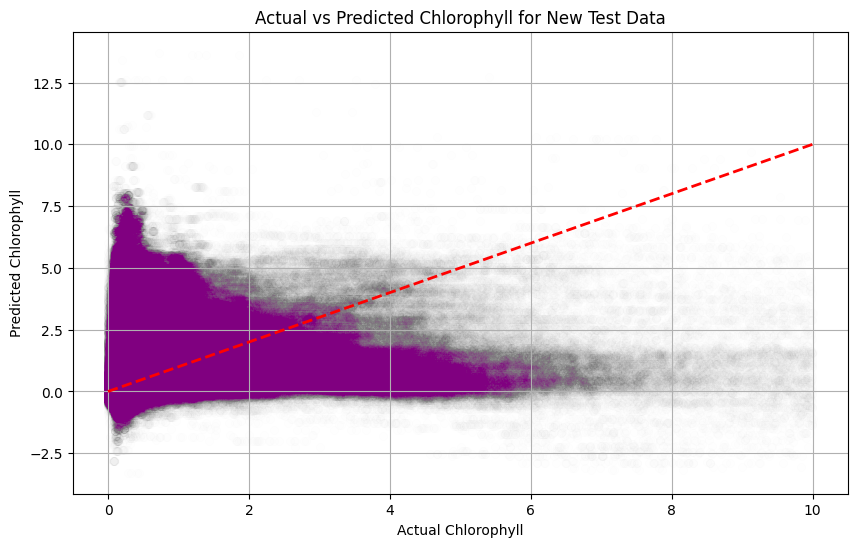

In [93]:
import matplotlib.pyplot as plt

# 如果有實際的 Chlorophyll 值，繪製實際值與預測值的對比圖
if 'Chlorophyll' in new_test_data.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(new_test_data['Chlorophyll'], new_test_data['Predicted_Chlorophyll'], alpha=0.002, color='purple')
    plt.plot([new_test_data['Chlorophyll'].min(), new_test_data['Chlorophyll'].max()], 
             [new_test_data['Chlorophyll'].min(), new_test_data['Chlorophyll'].max()], 'r--', lw=2)
    plt.title('Actual vs Predicted Chlorophyll for New Test Data')
    plt.xlabel('Actual Chlorophyll')
    plt.ylabel('Predicted Chlorophyll')
    plt.grid(True)
    plt.show()
else:
    # 如果沒有實際值，只繪製預測值的分布圖
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(new_test_predictions)), new_test_predictions, alpha=0.002, color='purple')
    plt.title('Predicted Chlorophyll for New Test Data')
    plt.xlabel('Sample Index')
    plt.ylabel('Predicted Chlorophyll')
    plt.grid(True)
    plt.show()


用這個模型測原本的

In [31]:
import joblib
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# 載入已保存的模型
loaded_model = joblib.load('mlp_regressor_model_10.pkl')
print("模型已成功載入")

# 讀取新的測試資料
new_test_data = pd.read_csv("data/new_test_data_2.csv")

# 選擇所需的特徵列
selected_columns = ['Albedo_01', 'Albedo_02', 'Albedo_03', 'Albedo_04']
X_new_test = new_test_data[selected_columns]

# 標準化數據
X_new_test = scaler.transform(X_new_test)

# 使用模型進行預測
new_test_predictions = loaded_model.predict(X_new_test)

# 將預測結果添加到資料框
new_test_data['Predicted_Chlorophyll'] = new_test_predictions

# 如果新測試資料包含實際的 Chlorophyll 值，計算評估指標
if 'Chlorophyll' in new_test_data.columns:
    # 計算誤差度量（MAE, RMSE, R2）
    mae = mean_absolute_error(new_test_data['Chlorophyll'], new_test_predictions)
    rmse = sqrt(mean_squared_error(new_test_data['Chlorophyll'], new_test_predictions))
    r2 = r2_score(new_test_data['Chlorophyll'], new_test_predictions)

    print(f"New Test MAE: {mae}")
    print(f"New Test RMSE: {rmse}")
    print(f"New Test R2: {r2}")

# 保存預測結果到新的CSV文件
new_test_data.to_csv("data/new_test_predictions.csv", index=False, encoding='utf-8-sig')
print("新的測試預測結果已保存為 'data/new_test_predictions.csv'")


模型已成功載入
New Test MAE: 0.11515963248501328
New Test RMSE: 0.26282766490079457
New Test R2: 0.6123786319601539
新的測試預測結果已保存為 'data/new_test_predictions.csv'


繪製實際值與預測值對比圖

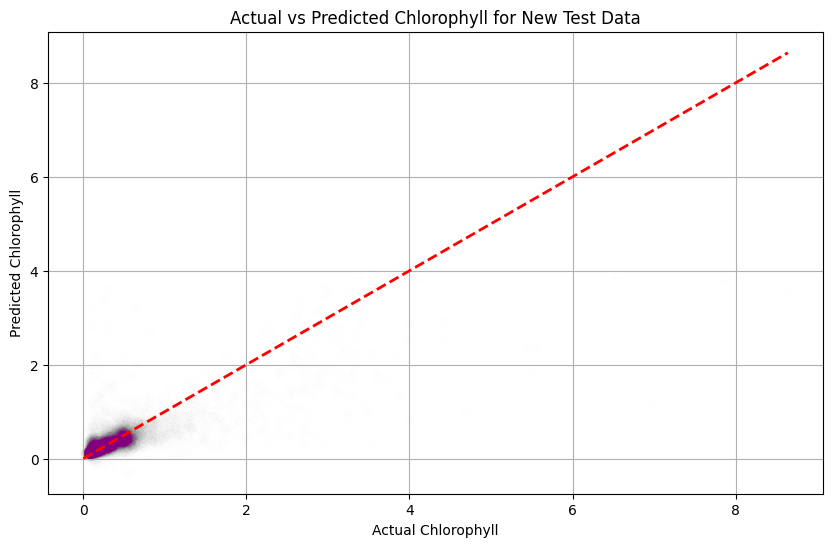

In [32]:
import matplotlib.pyplot as plt

# 如果有實際的 Chlorophyll 值，繪製實際值與預測值的對比圖
if 'Chlorophyll' in new_test_data.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(new_test_data['Chlorophyll'], new_test_data['Predicted_Chlorophyll'], alpha=0.002, color='purple')
    plt.plot([new_test_data['Chlorophyll'].min(), new_test_data['Chlorophyll'].max()], 
             [new_test_data['Chlorophyll'].min(), new_test_data['Chlorophyll'].max()], 'r--', lw=2)
    plt.title('Actual vs Predicted Chlorophyll for New Test Data')
    plt.xlabel('Actual Chlorophyll')
    plt.ylabel('Predicted Chlorophyll')
    plt.grid(True)
    plt.show()
else:
    # 如果沒有實際值，只繪製預測值的分布圖
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(new_test_predictions)), new_test_predictions, alpha=0.002, color='purple')
    plt.title('Predicted Chlorophyll for New Test Data')
    plt.xlabel('Sample Index')
    plt.ylabel('Predicted Chlorophyll')
    plt.grid(True)
    plt.show()